In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [11]:
file_path = r'C:\Users\dixit\Downloads\archive (1)\twitter_training.csv'
df = pd.read_csv(file_path)

In [50]:
df.head()

,ID,Entity,Sentiment,Content,Polarity,Subjectivity
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0.0,0.0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0.0,0.0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0.0,0.0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0.0,0.0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0.0,0.0


In [15]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv(r'C:\Users\dixit\Downloads\archive (1)\twitter_training.csv', names=col_names)

In [17]:
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [19]:
df.shape

(74682, 4)

In [21]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac wind

In [23]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [25]:
df.dropna(axis=0 , inplace=True)

In [27]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [29]:
df.duplicated().sum()

2340

In [31]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [33]:
df.shape

(71656, 4)

In [35]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

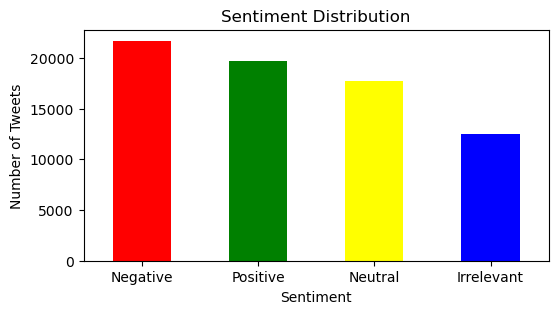

In [37]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [39]:

df['Polarity'] = df['Content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df[['Content', 'Polarity', 'Subjectivity']].head()


,Content,Polarity,Subjectivity
0,im getting on borderlands and i will murder yo...,0.0,0.0
1,I am coming to the borders and I will kill you...,0.0,0.0
2,im getting on borderlands and i will kill you ...,0.0,0.0
3,im coming on borderlands and i will murder you...,0.0,0.0
4,im getting on borderlands 2 and i will murder ...,0.0,0.0


In [40]:
pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 326.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 655.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 652.2 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/301.4 kB 756.6 kB/s eta 0:00:01
   ---------------------------------- --- 276.5/301.4 kB 944.1 kB/s eta 0:00:01
   ---------------------------------- --- 276.5/301.4 kB 944.1 kB/s eta 0:00:01
   ---------------------------------- --- 276.5/301.4 kB 944.1 kB/s eta 0:00:01
   ---------------------------------- --- 276.5/301.4 kB 944.1 kB/s eta 0:00:01
   ---------------------------------- --- 276.5/301.4 kB 944.1 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 600.3 kB/

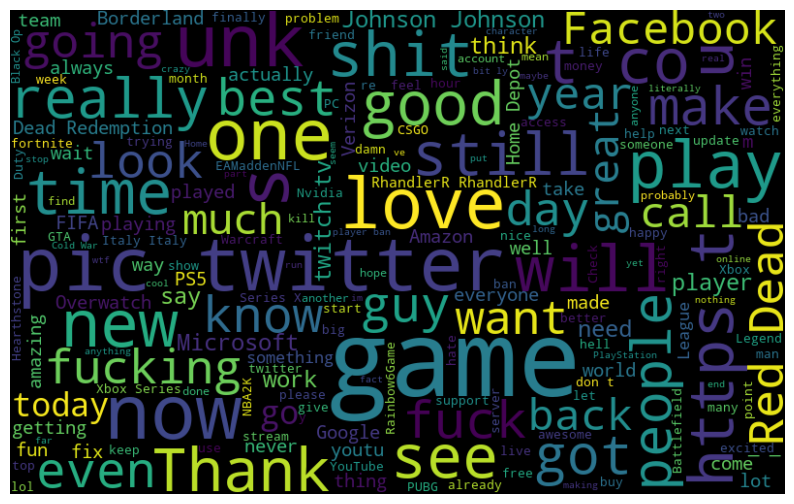

In [48]:
from wordcloud import WordCloud


all_words = ' '.join([tweet for tweet in df['Content']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


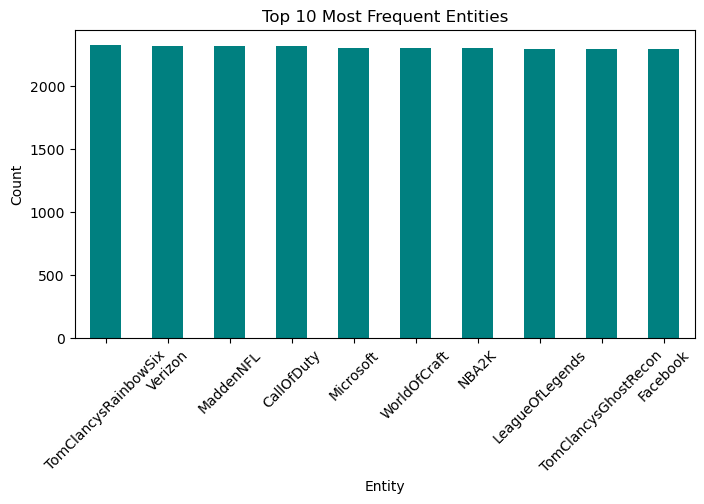

In [58]:

top_entities = df['Entity'].value_counts().head(10)


plt.figure(figsize=(8, 4))
top_entities.plot(kind='bar', color='teal')
plt.title('Top 10 Most Frequent Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


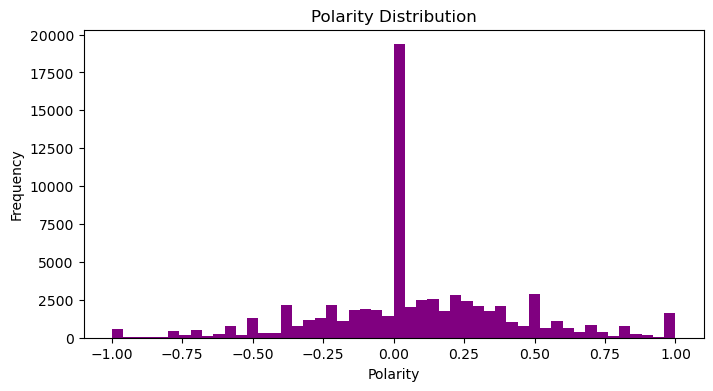

In [60]:
plt.figure(figsize=(8, 4))
plt.hist(df['Polarity'], bins=50, color='purple')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()
